# Preprocessing


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
pd.set_option('display.max_columns', 100)

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [0]:
train.shape

(595212, 59)

In [0]:
train.drop_duplicates()
train.shape

(595212, 59)

In [0]:
test.shape

(892816, 58)

Meta Data는 4가지로 구성 됩니다.  

role : 변수 역할, id/target/input 으로 포현합니다.  
level : 변수의 형태, nominal/interval/ordinal/binary 로 구성 돼 있습니다.  
keep : 변수의 사용 여부, True/False 로 구성 돼 있습니다.  
dtype : 변수의 타입, int/float/str 로 구성 돼 있습니다.  

In [0]:
def make_meta(df):
    data = []

    for f in df.columns:
        if f == 'target':
            role = 'target'
        elif f == 'id' :
            role = 'id'
        else:
            role = 'input'

        if 'bin' in f or f == 'target':
            level = 'binary'
        elif 'cat' in f or f == 'id':
            level = 'nominal'
        elif train[f].dtype == 'float64':
            level = 'interval'
        elif train[f].dtype == 'int64':
            level = 'ordinal'

        keep = True
        if f == 'id':
            keep = False

        dtype = df[f].dtype

        missing = False
        if df[f].apply(lambda x : x == -1).sum() > 0:
          missing = True

        f_dict = {
            'varname' : f,
            'role' : role,
            'level' : level,
            'keep' : keep,
            'dtype' : dtype,
            'missing' : missing    
        }
        data.append(f_dict)

    meta = pd.DataFrame(data, columns = ['varname', 'role', 'level', 'keep', 'dtype', 'missing'])
    meta.set_index('varname', inplace = True)
    return meta

In [0]:
meta_train = make_meta(train)
meta_test = make_meta(test)

In [0]:
meta_train

,role,level,keep,dtype,missing
varname,,,,,
id,id,nominal,False,int64,False
target,target,binary,True,int64,False
ps_ind_01,input,ordinal,True,int64,False
ps_ind_02_cat,input,nominal,True,int64,True
ps_ind_03,input,ordinal,True,int64,False
ps_ind_04_cat,input,nominal,True,int64,True
ps_ind_05_cat,input,nominal,True,int64,True
ps_ind_06_bin,input,binary,True,int64,False
ps_ind_07_bin,input,binary,True,int64,False


In [0]:
meta_test

,role,level,keep,dtype,missing
varname,,,,,
id,id,nominal,False,int64,False
ps_ind_01,input,ordinal,True,int64,False
ps_ind_02_cat,input,nominal,True,int64,True
ps_ind_03,input,ordinal,True,int64,False
ps_ind_04_cat,input,nominal,True,int64,True
ps_ind_05_cat,input,nominal,True,int64,True
ps_ind_06_bin,input,binary,True,int64,False
ps_ind_07_bin,input,binary,True,int64,False
ps_ind_08_bin,input,binary,True,int64,False


In [0]:
[f for f in meta_train.index if meta_train.loc[f, 'missing'] == True ]

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [0]:
def missing_table(df, meta):
    varname = [f for f in meta.index if meta.loc[f, 'missing'] == True ]
    val_count = []
    val_percent = []

    for f in varname:
        count = df[f].apply(lambda x : x == -1).sum()
        percent = count/df.shape[0] * 100
        val_count.append(count)
        val_percent.append(percent)

        data = pd.DataFrame({'varname' : varname,
                            'Missing Values' : val_count,
                            '% of Total Values' : val_percent})
        data.sort_values(by = '% of Total Values', inplace = True)
        data.set_index('varname', inplace = True)

        return data

In [0]:
missing_table(train, meta_train)

,Missing Values,% of Total Values
varname,,
ps_car_12,1,0.000168
ps_car_02_cat,5,0.000840
ps_car_11,5,0.000840
ps_ind_04_cat,83,0.013945
ps_car_01_cat,107,0.017977
ps_ind_02_cat,216,0.036290
ps_car_09_cat,569,0.095596
ps_ind_05_cat,5809,0.975955
ps_car_07_cat,11489,1.930237


In [0]:
missing_table(test, meta_test)

,Missing Values,% of Total Values
varname,,
ps_car_11,1,0.000112
ps_car_02_cat,5,0.000560
ps_ind_04_cat,145,0.016241
ps_car_01_cat,160,0.017921
ps_ind_02_cat,307,0.034386
ps_car_09_cat,877,0.098229
ps_ind_05_cat,8710,0.975565
ps_car_07_cat,17331,1.941161
ps_car_14,63805,7.146489


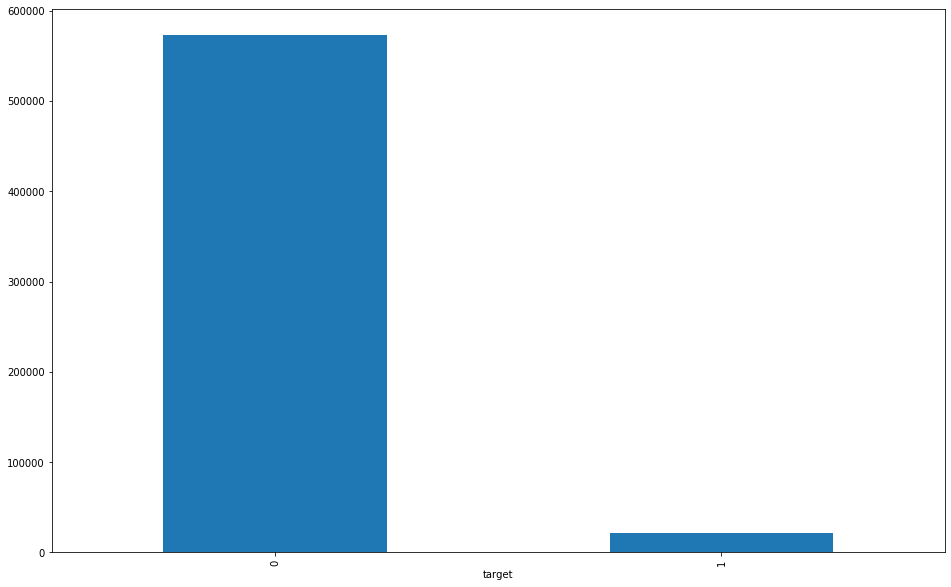

In [0]:
f, ax = plt.subplots(figsize = (16, 10))
train.groupby('target')['target'].count().plot(kind = 'bar', ax = ax)

불균형 데이터

## Random under-sampling

`DataFrame`의 `sample` 기능 사용

In [0]:
count_class_0, count_class_1 = train.target.value_counts()

In [0]:
count_class_0, count_class_1

(573518, 21694)

In [0]:
df_class_0 = train[train['target'] == 0]
df_class_1 = train[train['target'] == 1]

Random under-sampling:
1    21694
0    21694
Name: target, dtype: int64


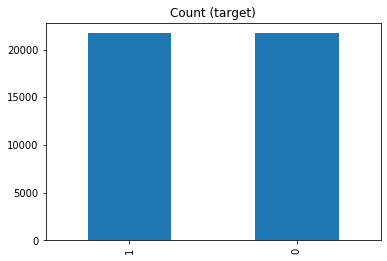

In [0]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

## Random over-sampling

Random over-sampling :
1    573518
0    573518
Name: target, dtype: int64


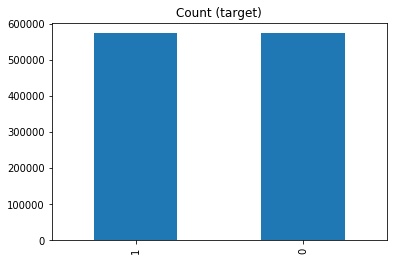

In [0]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

print('Random over-sampling :')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind = 'bar', title = 'Count (target)')

## Imbalanced - learn module

### Under-sampling
#### Random under-sampling


In [0]:
from imblearn.under_sampling import RandomUnderSampler

X = train.drop('target', axis = 1)
y = train.target

rus = RandomUnderSampler(return_indices = True, random_state = 2020)
# sample_indices_(= return_indices) = True, index 반환
X_rus, y_rus, id_rus = rus.fit_sample(X, y)
# X_rus : 랜덤으로 뽑힌 X들의 값
# y_rus : 랜덤으로 뽑힌 y들의 값
# id_rus : 랜덤으로 뽑힌 index 값

print('Removed indexes :', id_rus)

Removed indexes : [102906 296597 108619 ... 595099 595113 595158]


In [0]:
train.iloc[id_rus].groupby('target')['target'].count().to_frame()

,target
target,
0,21694
1,21694


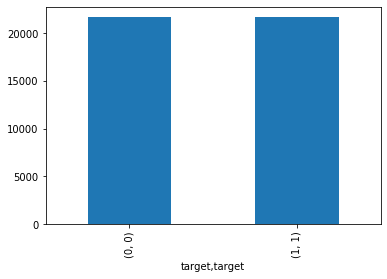

In [0]:
train.iloc[id_rus].groupby('target')['target'].value_counts().plot(kind = 'bar')

#### Tomek links
![tomek_link](./image/Tomek_links.png)  
서로 다른 클래스를 갖는 두 점 사이의 거리가  
어떤 다른 점들의 거리보다 작을 때 이를 __Tomek link__라 하고  

__Tomek link__에서 다수 클래스에 속하는 점을 찾아  
제거하는 방법.


In [0]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices = True, ratio = 'majority', random_state = 2020, n_jobs = -1)
# sampling_strategy(=ratio) = 'majority'는 다수 클래스의 값만 추출

X_tl, y_tl, id_tl = tl.fit_sample(X, y)

In [0]:
X_tl.shape, y_tl.shape

In [0]:
train.iloc[id_tl].groupby('target')['target'].count().to_frame()

#### CNN(Condensed Nearest Neighbour)
소수 클래스에 해당하는 집합을 $S$ 라 하고  
다수 클래스의 데이터에서 임의의 한 데이터를 추출한다.  

이후 나머지 데이터들에 대해 1-NN을 시행한다.  
다수 클래스 데이터 중 소수 클래스 데이터와 가까운 값들을 $S$에 할당시킨다.  

모든 데이터에 대해 시행하고 나서  
임의의 한 점과 $S$ 데이터를 제외하고 모두 삭제한다.  


In [0]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(sample_indices_ = True, random_state = 2020)
X_cnn, y_cnn, id_cnn = cnn.fit_sample(X, y)

In [0]:
train.iloc[id_cnn].groupby('target')['target'].count().to_frame()

#### One Sided Selection
CNN 기법과 Tomek_links 기법을 섞은 방식  


In [0]:
from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection(sample_indices_ = True, random_state = 2020)
X_oss, y_oss, id_oss = oss.fit_sample(x, y)

In [0]:
train.iloc[id_oss].groupby('target')['target'].count().to_frame()

### Over-sampling
#### Random over-sampling

In [0]:
from imblearn.over_sampling import RandomOverSampler

In [0]:
ros = RandomOverSampler(sample_indices_ = True, random_state = 2020)
X_ros, y_ros, id_ros = ros.fit_sample(X, y)
# X_ros : 랜덤으로 뽑힌 X들의 값
# y_ros : 랜덤으로 뽑힌 y들의 값
# id_ros : 랜덤으로 뽑힌 index 값

In [0]:
train.iloc[id_ros].groupby('target')['target'].count().to_frame()

,target
target,
0,573518
1,573518


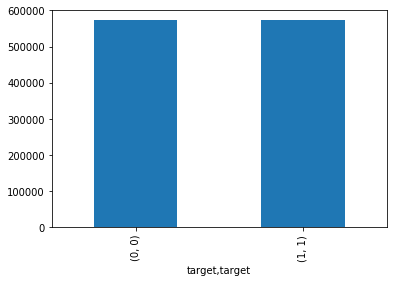

In [0]:
train.iloc[id_ros].groupby('target')['target'].value_counts().plot(kind = 'bar')

#### SMOTE(Synthetic Minority Over-sampling Technique)
K-NN의 기법을 이용한 알고리즘으로  
소수 클래스의 임의의 한 점을 선택 후  
$K$개의 주변 소수 클래스를 찾는다.  
그 안에서 하나를 무작위로 선택한 후  
두 점 거리 사이에 데이터를 추가하는 방식이다.  

![SMOTE](./image/SMOTE.png)  

In [0]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio = 'minority')
X_sm, y_sm = smote.fit_sample(X, y)

#### Borderline-SMOTE(Boderline Synthetic Minority Over-sampling Technique)
K-NN의 기법을 이용한 알고리즘으로  
소수 클래스의 임의의 한 점을 선택 후  
주변의 소수/다수 클래스 데이터의 개수를 구한다.  

이때,  
$K$ : 소수 클래스 주변 관측치 수  
$K'$ : K개 중 다수 클래스 관측치 수  
일 때  

- $K = K'$ : Noise 관측치  
- ${K \over 2 } < K' < K$ : Danger 관측치
- ${0  \leq K' \leq {K \over 2 }} $ : Safe 관측치
라 하면  

Danger 관측치에 대해서만 샘플을 생성하는 방식이다.  

![BSMOTE](./image/Borderline_SMOTE.png) 

In [0]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(ratio = 'minority')
X_bsm, y_bsm = bsmote.fit_sample(X, y)

### Reference 
- [비대칭 데이터 문제](https://datascienceschool.net/view-notebook/c1a8dad913f74811ae8eef5d3bedc0c3/)  
- [Resampling strategies for imbalanced datasets](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)  
- [이분형자료의 분류문제에서 불균형을
다루기 위한 표본 재추출 방법비교](https://ir.ymlib.yonsei.ac.kr/bitstream/22282913/166457/1/T014975.pdf)  
- [[핵심 머신러닝] 불균형 데이터 분석을 위한 샘플링 기법](https://www.youtube.com/watch?v=Vhwz228VrIk)  
- [Borderline-SMOTE: A New Over-Sampling Method in Imbalanced Data Sets Learning](https://sci2s.ugr.es/keel/keel-dataset/pdfs/2005-Han-LNCS.pdf)
